In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

franceDataset = pd.read_csv("../../Datasets/Francia/france_clean.csv")

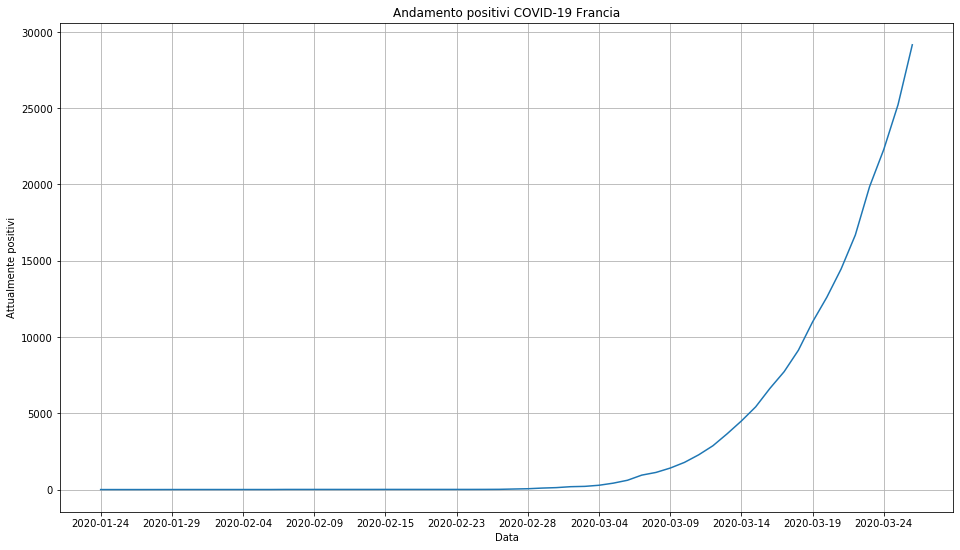

In [94]:
#Get list of dates (X axis)
date = franceDataset[franceDataset["maille_nom"] == "France"]["date"].tolist()

#Get list of positives to COVID19 (Y axis)
numeroPositivi = franceDataset[franceDataset["maille_nom"] == "France"]["cas_confirmes"].tolist()

#Create the plot
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(date, numeroPositivi)

#Customize
ax.set(xlabel = 'Data', ylabel = 'Attualmente positivi', title = 'Andamento positivi COVID-19 Francia')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.grid()

#Show plot
plt.show()

In [95]:
# Get last day present in the dataset
lastDay = franceDataset["date"].iloc[-1]

# Get name for top 3 infected regions
region = franceDataset[franceDataset["date"] == lastDay]
region = region[region["granularite"] == "region"]
region = region.sort_values(by=['cas_confirmes'], ascending=False)
topFourRegion = region["maille_nom"].iloc[0:4].tolist()

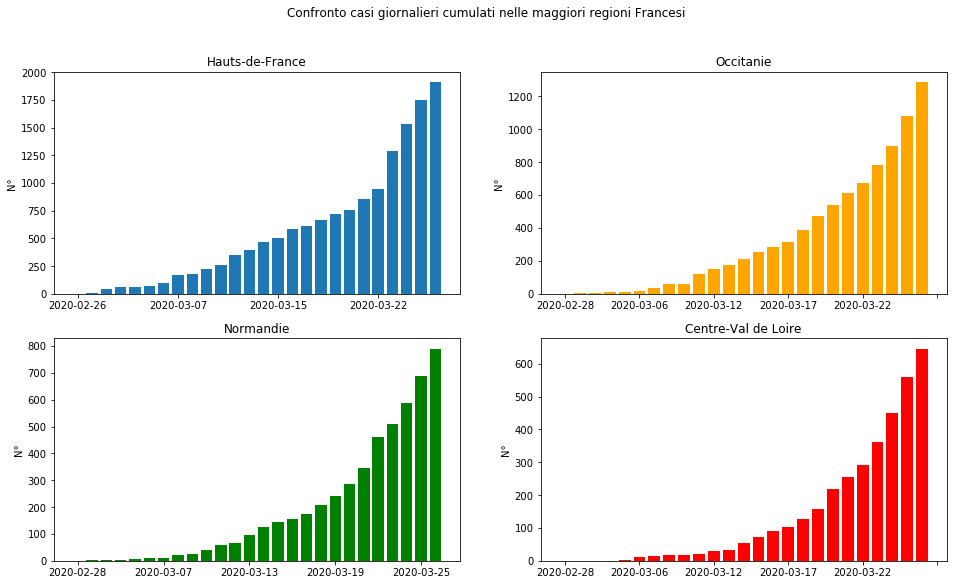

In [98]:
#Get list of dates (X axis)
date = franceDataset["date"].unique().tolist()
maxDate = max(date)

# Get list of new confirmed cases (daily value) 1st Region
region_1 = franceDataset[franceDataset['maille_nom'] == topFourRegion[0]]
totaleCasiR1 = region_1['cas_confirmes'].values

#Get list of new confirmed cases (daily value) Lombardia
region_2 = franceDataset[franceDataset['maille_nom'] == topFourRegion[1]]
totaleCasiR2 = region_2['cas_confirmes'].values

#Get list of new confirmed cases (daily value) Emilia Romagna
region_3 = franceDataset[franceDataset['maille_nom'] == topFourRegion[2]]
totaleCasiR3 = region_3['cas_confirmes'].values

#Get list of new confirmed cases (daily value) Emilia Romagna
region_4 = franceDataset[franceDataset['maille_nom'] == topFourRegion[3]]
totaleCasiR4 = region_4['cas_confirmes'].values

#Create second plot
fig, ax = plt.subplots(2,2,figsize=(16,9))
ax[0,0].bar(region_1["date"].unique().tolist(), totaleCasiR1,label='Casi giornalieri %s' %(topFourRegion[0]))
ax[0,1].bar(region_2["date"].unique().tolist(), totaleCasiR2,label='Casi giornalieri %s' %(topFourRegion[1]),color='orange')
ax[1,0].bar(region_3["date"].unique().tolist(), totaleCasiR3,label='Casi giornalieri %s' %(topFourRegion[2]),color='green')
ax[1,1].bar(region_4["date"].unique().tolist(), totaleCasiR4,label='Casi giornalieri %s' %(topFourRegion[2]),color='red')


#Customize
label=topFourRegion
fig.suptitle('Confronto casi giornalieri cumulati nelle maggiori regioni Francesi')
for axs,l in zip(ax.flat,label):
    axs.set(ylabel = 'N°', title=l)
    axs.xaxis.set_major_locator(MultipleLocator(5))

ax[0,0].xaxis.set_major_locator(MultipleLocator(7))
ax[1,0].xaxis.set_major_locator(MultipleLocator(6))

plt.show()